<a href="https://colab.research.google.com/github/cecellhax/analises_covid19/blob/main/covid_ma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Anális dos dados da COVID-19 no estado do Maranhão**

Dados de todo o estado e de algumas de sua principais cidades.


**1.   Testes realizados;**

**2.   Profissionais da saúde;**

**3.   Sexo dos infectados;**

**4.   Idade dos infectados.**



Disponíveis em: https://s3-sa-east-1.amazonaws.com/ckan.saude.gov.br/dados-ma.csv

In [110]:
import pandas as pd
import matplotlib.pyplot as plt

In [111]:
covid_ma = pd.read_csv('https://s3-sa-east-1.amazonaws.com/ckan.saude.gov.br/dados-ma.csv', encoding='latin1', sep=';')

In [112]:
covid_ma.head()

,ÿid,dataNotificacao,dataInicioSintomas,dataNascimento,sintomas,profissionalSaude,cbo,condicoes,estadoTeste,dataTeste,tipoTeste,resultadoTeste,paisOrigem,sexo,estado,estadoIBGE,municipio,municipioIBGE,origem,estadoNotificacao,estadoNotificacaoIBGE,municipioNotificacao,municipioNotificacaoIBGE,excluido,validado,idade,dataEncerramento,evolucaoCaso,classificacaoFinal
0,AbEVo5S4nX,2020-03-30T03:00:00.000Z,2020-03-29T03:00:00.000Z,undefined,Tosse,Sim,2235 - Enfermeiro,NaN,Coletado,2020-03-30T03:00:00.000Z,NaN,NaN,undefined,Masculino,MARANHÃO,21,São Luís,2111300.0,undefined,MARANHÃO,21.0,São Luís,2111300.0,undefined,undefined,55.0,NaN,NaN,NaN
1,ozHhVSzSdq,2020-04-06T13:17:27.512Z,2020-03-22T03:00:00.000Z,undefined,"Febre, Tosse, Dispneia, Outros",Não,NaN,NaN,Coletado,2020-04-06T03:00:00.000Z,NaN,NaN,undefined,Masculino,MARANHÃO,21,Imperatriz,2105302.0,undefined,MARANHÃO,21.0,Imperatriz,2105302.0,undefined,undefined,47.0,NaN,NaN,NaN
2,6KJS2Qdpq2,2020-04-01T03:00:00.000Z,2020-03-26T03:00:00.000Z,undefined,"Dor de Garganta, Dispneia, Febre, Tosse",Sim,2235 - Enfermeiro,NaN,Coletado,2020-04-02T03:00:00.000Z,NaN,NaN,undefined,Feminino,MARANHÃO,21,São Luís,2111300.0,undefined,MARANHÃO,21.0,São Luís,2111300.0,undefined,undefined,37.0,NaN,NaN,NaN
3,SXtw57busW,2020-04-01T03:00:00.000Z,2020-03-31T03:00:00.000Z,undefined,"Dispneia, Tosse",Não,NaN,NaN,Coletado,2020-04-01T03:00:00.000Z,NaN,NaN,undefined,Feminino,MARANHÃO,21,São José de Ribamar,2111201.0,undefined,MARANHÃO,21.0,São Luís,2111300.0,undefined,undefined,33.0,NaN,NaN,NaN
4,NgKU8QKx0X,2020-04-06T07:23:33.348Z,2020-04-04T04:00:00.000Z,undefined,"Tosse, Outros",Não,NaN,NaN,NaN,NaN,NaN,NaN,undefined,Masculino,MARANHÃO,21,São Luís,2111300.0,undefined,MARANHÃO,21.0,São Luís,2111300.0,undefined,undefined,56.0,NaN,NaN,NaN


In [113]:
covid_ma.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 832220 entries, 0 to 832219
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ÿid                       832220 non-null  object 
 1   dataNotificacao           831443 non-null  object 
 2   dataInicioSintomas        826805 non-null  object 
 3   dataNascimento            832220 non-null  object 
 4   sintomas                  831778 non-null  object 
 5   profissionalSaude         830622 non-null  object 
 6   cbo                       46541 non-null   object 
 7   condicoes                 78823 non-null   object 
 8   estadoTeste               801153 non-null  object 
 9   dataTeste                 658216 non-null  object 
 10  tipoTeste                 655967 non-null  object 
 11  resultadoTeste            595336 non-null  object 
 12  paisOrigem                832220 non-null  object 
 13  sexo                      832214 non-null  o

In [114]:
testes_ma = covid_ma.value_counts('resultadoTeste').sum()

In [115]:
testes_ma

595336

In [116]:
covid_ma.value_counts('resultadoTeste')

resultadoTeste
Negativo                         327232
Positivo                         267800
Inconclusivo ou Indeterminado       304
dtype: int64

In [117]:
result_ma = covid_ma.value_counts('resultadoTeste')

In [118]:
result_ma = result_ma.drop('Inconclusivo ou Indeterminado')

In [119]:
result_ma

resultadoTeste
Negativo    327232
Positivo    267800
dtype: int64




**Profissionais da saúde infectados no Maranhão**

In [120]:
pi_ma = covid_ma.query('profissionalSaude == "Sim" & resultadoTeste == "Positivo"')

In [121]:
tpi_ma = pi_ma.value_counts('resultadoTeste')

In [122]:
tpi_ma

resultadoTeste
Positivo    10818
dtype: int64

**Sexo dos infectados no Maranhão**

In [123]:
positivo_df = covid_ma.query('resultadoTeste == "Positivo"')

In [124]:
positivos_sexo_ma = positivo_df.value_counts('sexo')

In [125]:
positivos_sexo_ma

sexo
Feminino      148868
Masculino     118761
Indefinido       171
dtype: int64

**Idade dos infectados no Maranhão**

In [126]:
idade_filtrada = positivo_df.query('idade > 0 & idade <= 100')

In [127]:
idade_filtrada['idade']

771       47.0
789       37.0
791       41.0
817       86.0
975       41.0
          ... 
832209    57.0
832214    14.0
832215    65.0
832217    31.0
832219    32.0
Name: idade, Length: 266039, dtype: float64

In [128]:
idades = idade_filtrada.value_counts('idade')

In [129]:
idades

idade
37.0     6380
35.0     6296
36.0     6295
39.0     6240
38.0     6233
         ... 
95.0       83
98.0       68
97.0       58
100.0      46
99.0       44
Length: 100, dtype: int64

### **São Luís -  Capital**

In [131]:
covid_slz = covid_ma.query('municipio == "São Luís"')

In [132]:
covid_slz.head()

,ÿid,dataNotificacao,dataInicioSintomas,dataNascimento,sintomas,profissionalSaude,cbo,condicoes,estadoTeste,dataTeste,tipoTeste,resultadoTeste,paisOrigem,sexo,estado,estadoIBGE,municipio,municipioIBGE,origem,estadoNotificacao,estadoNotificacaoIBGE,municipioNotificacao,municipioNotificacaoIBGE,excluido,validado,idade,dataEncerramento,evolucaoCaso,classificacaoFinal
0,AbEVo5S4nX,2020-03-30T03:00:00.000Z,2020-03-29T03:00:00.000Z,undefined,Tosse,Sim,2235 - Enfermeiro,NaN,Coletado,2020-03-30T03:00:00.000Z,NaN,NaN,undefined,Masculino,MARANHÃO,21,São Luís,2111300.0,undefined,MARANHÃO,21.0,São Luís,2111300.0,undefined,undefined,55.0,NaN,NaN,NaN
2,6KJS2Qdpq2,2020-04-01T03:00:00.000Z,2020-03-26T03:00:00.000Z,undefined,"Dor de Garganta, Dispneia, Febre, Tosse",Sim,2235 - Enfermeiro,NaN,Coletado,2020-04-02T03:00:00.000Z,NaN,NaN,undefined,Feminino,MARANHÃO,21,São Luís,2111300.0,undefined,MARANHÃO,21.0,São Luís,2111300.0,undefined,undefined,37.0,NaN,NaN,NaN
4,NgKU8QKx0X,2020-04-06T07:23:33.348Z,2020-04-04T04:00:00.000Z,undefined,"Tosse, Outros",Não,NaN,NaN,NaN,NaN,NaN,NaN,undefined,Masculino,MARANHÃO,21,São Luís,2111300.0,undefined,MARANHÃO,21.0,São Luís,2111300.0,undefined,undefined,56.0,NaN,NaN,NaN
5,Y5rlV9HJRa,2020-04-06T13:31:04.344Z,2020-03-03T03:00:00.000Z,undefined,"Dor de Garganta, Dispneia, Febre, Tosse, Outros",Sim,3222 - Técnico ou Auxiliar em Enfermagem,NaN,Coletado,2020-04-06T03:00:00.000Z,NaN,NaN,undefined,Masculino,MARANHÃO,21,São Luís,2111300.0,undefined,MARANHÃO,21.0,São Luís,2111300.0,undefined,undefined,33.0,NaN,NaN,NaN
6,SepJKM9O3F,2020-04-06T13:17:10.116Z,2020-03-29T03:00:00.000Z,undefined,Tosse,Não,NaN,NaN,Coletado,2020-04-01T03:00:00.000Z,NaN,NaN,undefined,Feminino,MARANHÃO,21,São Luís,2111300.0,undefined,MARANHÃO,21.0,São Luís,2111300.0,undefined,undefined,63.0,NaN,NaN,NaN


In [133]:
testes_slz = covid_slz.value_counts('resultadoTeste').sum()

In [134]:
testes_slz

93318

In [135]:
covid_slz.value_counts('resultadoTeste')

resultadoTeste
Negativo                         62754
Positivo                         30542
Inconclusivo ou Indeterminado       22
dtype: int64

In [136]:
result_slz = covid_slz.value_counts('resultadoTeste')

In [137]:
result_slz = result_slz.drop('Inconclusivo ou Indeterminado')

In [138]:
result_slz

resultadoTeste
Negativo    62754
Positivo    30542
dtype: int64

**Profissionais da saúde infectados em São Luís**







In [139]:
pi_slz = covid_slz.query('profissionalSaude == "Sim" & resultadoTeste == "Positivo"')

In [140]:
tpi_slz = pi_slz.value_counts('resultadoTeste')

In [141]:
tpi_slz

resultadoTeste
Positivo    2883
dtype: int64

**Sexo dos infectados em São Luís**

In [142]:
positivo_slz = covid_slz.query('resultadoTeste == "Positivo"')

In [143]:
positivos_sexo_slz = positivo_slz.value_counts('sexo')

In [144]:
positivos_sexo_slz

sexo
Masculino     15675
Feminino      14770
Indefinido       97
dtype: int64

# **Açailândia**

In [145]:
covid_acai = covid_ma.query('municipio == "Açailândia"')

In [146]:
covid_acai.head()

,ÿid,dataNotificacao,dataInicioSintomas,dataNascimento,sintomas,profissionalSaude,cbo,condicoes,estadoTeste,dataTeste,tipoTeste,resultadoTeste,paisOrigem,sexo,estado,estadoIBGE,municipio,municipioIBGE,origem,estadoNotificacao,estadoNotificacaoIBGE,municipioNotificacao,municipioNotificacaoIBGE,excluido,validado,idade,dataEncerramento,evolucaoCaso,classificacaoFinal
72,HSeQP58XwJ,2020-04-05T03:00:00.000Z,2020-03-13T03:00:00.000Z,undefined,"Dor de Garganta, Dispneia, Tosse",Não,NaN,Doenças cardíacas crônicas,NaN,NaN,NaN,NaN,undefined,Masculino,MARANHÃO,21,Açailândia,2100055.0,undefined,MARANHÃO,21.0,Açailândia,2100055.0,undefined,undefined,45.0,NaN,NaN,NaN
373,0ggNmmd4d8,2020-04-04T03:00:00.000Z,2020-03-30T03:00:00.000Z,undefined,"Tosse, Febre, Dispneia",Não,NaN,Doenças respiratórias crônicas descompensadas,NaN,NaN,NaN,NaN,undefined,Masculino,MARANHÃO,21,Açailândia,2100055.0,undefined,MARANHÃO,21.0,Açailândia,2100055.0,undefined,undefined,40.0,NaN,NaN,NaN
719,XMTKArMD4Z,2020-04-03T20:15:20.670Z,2020-03-28T03:00:00.000Z,undefined,"Febre,Tosse,Dispneia",Não,NaN,NaN,NaN,NaN,NaN,NaN,undefined,Feminino,MARANHÃO,21,Açailândia,2100055.0,undefined,MARANHÃO,21.0,Açailândia,2100055.0,undefined,undefined,39.0,NaN,NaN,NaN
794,FrXtr4D2Me,2020-04-04T16:01:30.910Z,2020-04-04T03:00:00.000Z,undefined,"Dor de Garganta,Dispneia,Febre",Não,NaN,NaN,NaN,NaN,NaN,NaN,undefined,Feminino,MARANHÃO,21,Açailândia,2100055.0,undefined,MARANHÃO,21.0,Açailândia,2100055.0,undefined,undefined,29.0,NaN,NaN,NaN
824,DYMCe6QVBa,2020-04-05T15:47:12.970Z,2020-03-24T03:00:00.000Z,undefined,"Tosse, Febre, Dispneia, Dor de Garganta",Sim,3222 - Técnico ou Auxiliar em Enfermagem,NaN,Solicitado,NaN,NaN,NaN,undefined,Feminino,MARANHÃO,21,Açailândia,2100055.0,undefined,MARANHÃO,21.0,Açailândia,2100055.0,undefined,undefined,45.0,NaN,NaN,NaN


In [147]:
testes_acai = covid_acai.value_counts('resultadoTeste').sum()

In [148]:
testes_acai

12227

In [149]:
result_acai = covid_acai.value_counts('resultadoTeste')

In [150]:
result_acai

resultadoTeste
Negativo    7387
Positivo    4840
dtype: int64

**Profissionais da saúde infectados em Açailândia**

In [151]:
pi_acai = covid_acai.query('profissionalSaude == "Sim" & resultadoTeste == "Positivo"')

In [152]:
tpi_acai = pi_acai.value_counts('resultadoTeste')

In [153]:
tpi_acai

resultadoTeste
Positivo    41
dtype: int64

**Sexo dos infectados em Açailândia**

In [154]:
positivo_acai = covid_acai.query('resultadoTeste == "Positivo"')

In [155]:
positivos_sexo_acai = positivo_acai.value_counts('sexo')

In [156]:
positivos_sexo_acai

sexo
Masculino     2455
Feminino      2380
Indefinido       5
dtype: int64

# **Imperatriz**

In [157]:
covid_itz = covid_ma.query('municipio == "Imperatriz"')

In [158]:
covid_itz.head()

,ÿid,dataNotificacao,dataInicioSintomas,dataNascimento,sintomas,profissionalSaude,cbo,condicoes,estadoTeste,dataTeste,tipoTeste,resultadoTeste,paisOrigem,sexo,estado,estadoIBGE,municipio,municipioIBGE,origem,estadoNotificacao,estadoNotificacaoIBGE,municipioNotificacao,municipioNotificacaoIBGE,excluido,validado,idade,dataEncerramento,evolucaoCaso,classificacaoFinal
1,ozHhVSzSdq,2020-04-06T13:17:27.512Z,2020-03-22T03:00:00.000Z,undefined,"Febre, Tosse, Dispneia, Outros",Não,NaN,NaN,Coletado,2020-04-06T03:00:00.000Z,NaN,NaN,undefined,Masculino,MARANHÃO,21,Imperatriz,2105302.0,undefined,MARANHÃO,21.0,Imperatriz,2105302.0,undefined,undefined,47.0,NaN,NaN,NaN
52,C0ya737eMv,2020-04-06T03:00:00.000Z,2020-03-30T03:00:00.000Z,undefined,"Dor de Garganta, Febre, Tosse",Não,NaN,NaN,NaN,NaN,NaN,NaN,undefined,Feminino,MARANHÃO,21,Imperatriz,2105302.0,undefined,MARANHÃO,21.0,Governador Edison Lobão,2104552.0,undefined,undefined,26.0,NaN,NaN,NaN
57,JUzKNcyiIH,2020-04-06T03:00:00.000Z,2020-04-05T03:00:00.000Z,undefined,Tosse,Não,NaN,NaN,NaN,NaN,NaN,NaN,undefined,Masculino,MARANHÃO,21,Imperatriz,2105302.0,undefined,MARANHÃO,21.0,Governador Edison Lobão,2104552.0,undefined,undefined,30.0,NaN,NaN,NaN
63,ECYrdK7ZN6,2020-04-06T03:00:00.000Z,2020-04-04T03:00:00.000Z,undefined,"Dispneia, Febre",Não,NaN,NaN,NaN,NaN,NaN,NaN,undefined,Feminino,MARANHÃO,21,Imperatriz,2105302.0,undefined,MARANHÃO,21.0,Governador Edison Lobão,2104552.0,undefined,undefined,41.0,NaN,NaN,NaN
164,SsE6bE0dw8,2020-04-06T18:04:25.570Z,2020-04-06T03:00:00.000Z,undefined,"Outros, Dispneia",Sim,225 - Médico,Doenças cardíacas crônicas,Coletado,2020-04-06T03:00:00.000Z,NaN,NaN,undefined,Masculino,MARANHÃO,21,Imperatriz,2105302.0,undefined,MARANHÃO,21.0,Imperatriz,2105302.0,undefined,undefined,70.0,NaN,NaN,NaN


In [159]:
testes_itz = covid_itz.value_counts('resultadoTeste').sum()

In [160]:
testes_itz

49151

In [161]:
result_itz = covid_itz.value_counts('resultadoTeste')   

In [162]:
result_itz = result_itz.drop('Inconclusivo ou Indeterminado')

In [163]:
result_itz

resultadoTeste
Negativo    31162
Positivo    17972
dtype: int64

**Profissionais da saúde infectados em Imperatriz**

In [164]:
pi_itz = covid_itz.query('profissionalSaude == "Sim" & resultadoTeste == "Positivo"')

In [165]:
tpi_itz = pi_itz.value_counts('resultadoTeste')

In [166]:
tpi_itz

resultadoTeste
Positivo    721
dtype: int64

**Sexo dos infectados em Imperatriz**

In [167]:
positivo_itz = covid_itz.query('resultadoTeste == "Positivo"')

In [168]:
positivos_sexo_itz = positivo_itz.value_counts('sexo')

In [169]:
positivos_sexo_itz.sort_index

<bound method Series.sort_index of sexo
Feminino      9769
Masculino     8196
Indefinido       7
dtype: int64>

# **Visualização dos dados**

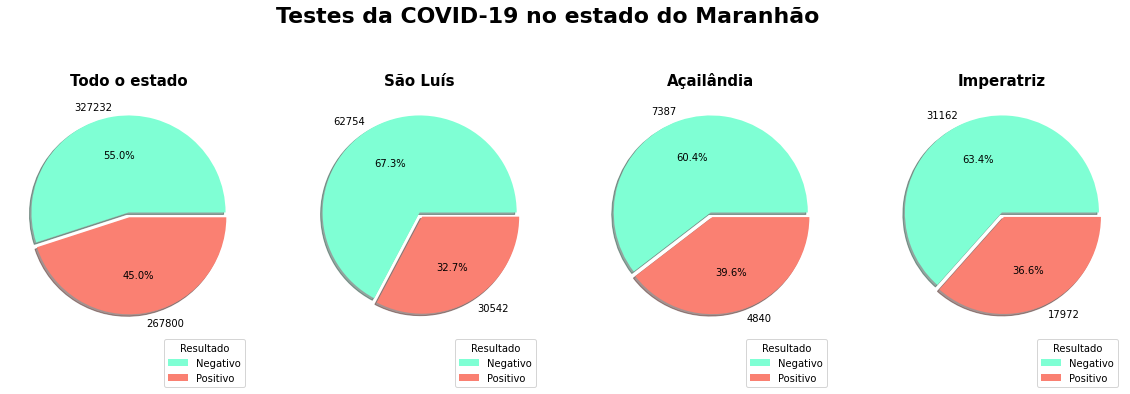

In [170]:
#---------Testes da COVID-19 no estado do Maranhão---------
cores = ['#7FFFD4', '#FA8072']
legenda = ['Negativo', 'Positivo']

fig,(ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20,6))
plt.suptitle('Testes da COVID-19 no estado do Maranhão', weight='bold', size=22)

ax1.pie(result_ma, labels=result_ma, autopct='%1.1f%%', shadow=True, explode=(0,0.05), colors=cores)
ax1.set_title('Todo o estado', weight='bold', size=15)
ax1.legend(legenda, title='Resultado', bbox_to_anchor=(1, 0))

ax2.pie(result_slz, labels=result_slz, autopct='%1.1f%%', shadow=True, explode=(0,0.05), colors=cores)
ax2.set_title('São Luís', weight='bold', size=15)
ax2.legend(legenda, title='Resultado', bbox_to_anchor=(1, 0))

ax3.pie(result_acai, labels=result_acai, autopct='%1.1f%%', shadow=True, explode=(0,0.05), colors=cores)
ax3.set_title('Açailândia', weight='bold', size=15)
ax3.legend(legenda, title='Resultado', bbox_to_anchor=(1, 0))

ax4.pie(result_itz, labels=result_itz, autopct='%1.1f%%', shadow=True, explode=(0,0.05), colors=cores)
ax4.set_title('Imperatriz', weight='bold', size=15)
ax4.legend(legenda, title='Resultado', bbox_to_anchor=(1, 0))

plt.show()

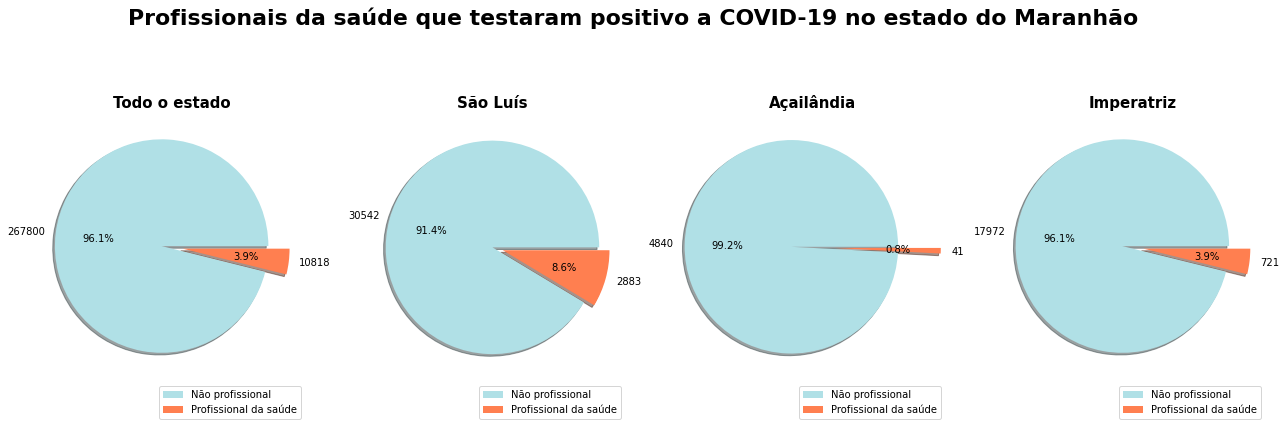

In [171]:
#---------Profissionais da saúde que testaram positivo a COVID-19---------
cores = ['#B0E0E6', '#FF7F50']
ma = (result_ma['Positivo'], tpi_ma['Positivo'])
slz = (result_slz['Positivo'], tpi_slz['Positivo'])
acai = (result_acai['Positivo'], tpi_acai['Positivo'])
itz = (result_itz['Positivo'], tpi_itz['Positivo'])
legenda = ('Não profissional', 'Profissional da saúde')

fig,(ax1, ax2, ax3, ax4)= plt.subplots(1,4, figsize = (22,7))
plt.suptitle('Profissionais da saúde que testaram positivo a COVID-19 no estado do Maranhão', weight='bold', size=22)

ax1.pie(ma, labels=ma, autopct='%1.1f%%', shadow=True, explode=(0.1,0.1), colors=cores)
ax1.set_title('Todo o estado', weight='bold', size=15)
ax1.legend(legenda, bbox_to_anchor=(1, 0))

ax2.pie(slz, labels=slz, autopct='%1.1f%%', shadow=True, explode=(0,0.1), colors=cores)
ax2.set_title('São Luís', weight='bold', size=15)
ax2.legend(legenda, bbox_to_anchor=(1, 0))

ax3.pie(acai, labels=acai, autopct='%1.1f%%', shadow=True, explode=(0.2,0.2), colors=cores)
ax3.set_title('Açailândia', weight='bold', size=15)
ax3.legend(legenda, bbox_to_anchor=(1, 0))

ax4.pie(itz, labels=itz, autopct='%1.1f%%', shadow=True, explode=(0.1,0.1), colors=cores)
ax4.set_title('Imperatriz', weight='bold', size=15)
ax4.legend(legenda, bbox_to_anchor=(1, 0))

plt.show()

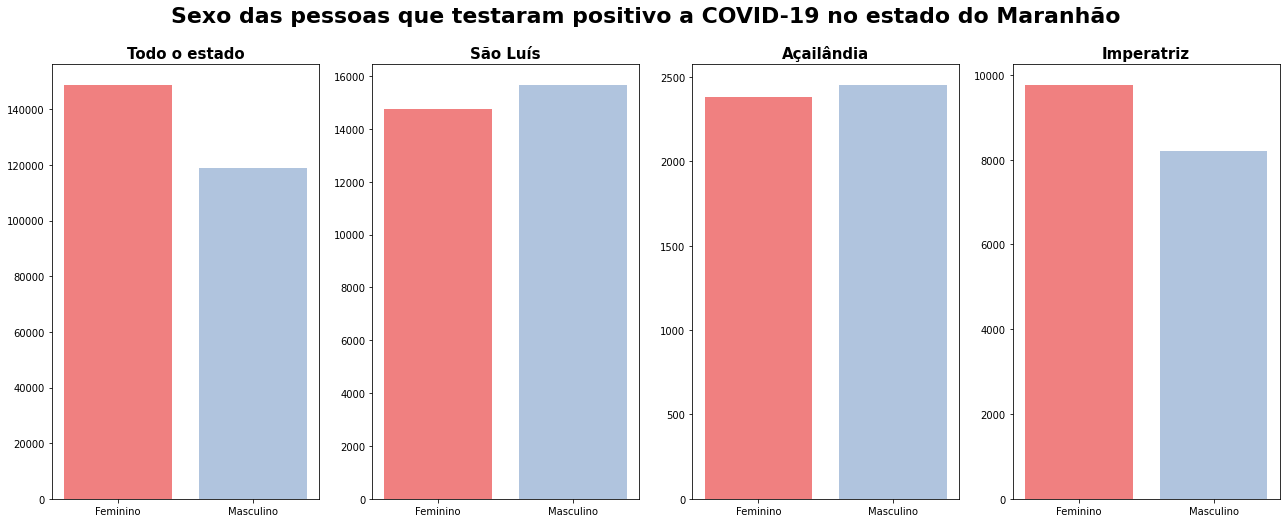

In [172]:
#---------Sexo das pessoa que testaram positivo a COVID-19---------

cores = ('#F08080', '#B0C4DE', '#FF0000')
legenda = ('Feminino', 'Masculino')
ma = (positivos_sexo_ma['Feminino'], positivos_sexo_ma['Masculino'])
slz = (positivos_sexo_slz['Feminino'], positivos_sexo_slz['Masculino'])
acai = (positivos_sexo_acai['Feminino'], positivos_sexo_acai['Masculino'])
itz = (positivos_sexo_itz['Feminino'], positivos_sexo_itz['Masculino'])

fig,(ax1, ax2, ax3, ax4)= plt.subplots(1,4, figsize = (22,8))
plt.suptitle('Sexo das pessoas que testaram positivo a COVID-19 no estado do Maranhão', weight='bold', size=22)

ax1.bar(legenda, ma, color=cores)
ax1.set_title('Todo o estado', weight='bold', size=15)

ax2.bar(legenda, slz, color=cores)
ax2.set_title('São Luís', weight='bold', size=15)

ax3.bar(legenda, acai, color=cores)
ax3.set_title('Açailândia', weight='bold', size=15)

ax4.bar(legenda, itz, color=cores)
ax4.set_title('Imperatriz', weight='bold', size=15)

plt.show()

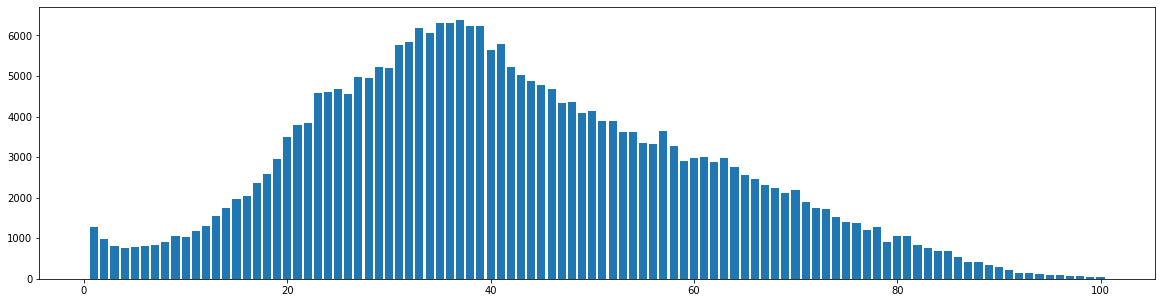

In [179]:
plt.figure(figsize=(20,5))
plt.bar(idades.index, idades.values)

plt.show()